In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [7]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [11]:
len(x_train)
len(x_test)

10000

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

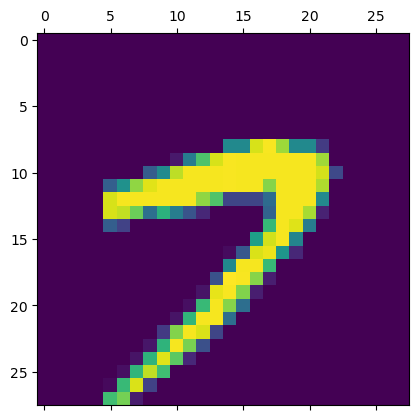

In [20]:
plt.matshow(x_train[91])

In [22]:
y_train[91]

7

In [23]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [53]:
x_train=x_train/255
x_test=x_test/255

In [54]:
x_train_flattern=x_train.reshape(len(x_train),28*28)
x_test_flattern=x_test.reshape(len(x_test),28*28)

In [55]:
x_train_flattern.shape
x_test_flattern.shape

(10000, 784)

In [56]:
x_test_flattern[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [57]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer= 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattern , y_train,epochs=6)

Epoch 1/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4691 - accuracy: 0.8793
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3043 - accuracy: 0.9142
Epoch 3/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.9206
Epoch 4/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2728 - accuracy: 0.9242
Epoch 5/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9253
Epoch 6/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2618 - accuracy: 0.9271


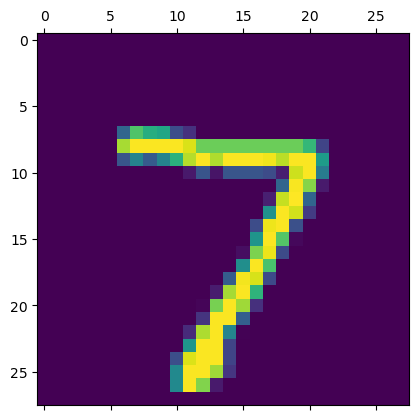

In [58]:
plt.matshow(x_test[0])

In [59]:
y_predict = model.predict(x_test_flattern)
y_predict[0]

313/313 [==============================] - 1s 2ms/step


array([1.28406687e-02, 1.07753564e-07, 2.60224137e-02, 9.67880726e-01,
       1.42314285e-03, 1.65223584e-01, 3.99051231e-07, 9.99823868e-01,
       1.27981395e-01, 7.23535120e-01], dtype=float32)

In [61]:
np.argmax(y_predict[0])

7

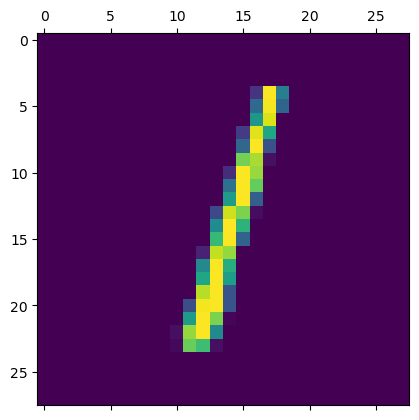

In [65]:
plt.matshow(x_test[2])

In [64]:
np.argmax(y_predict[2])

1

In [71]:
y_predict_label=[np.argmax(i)for i in y_predict]
y_predict_label[:5]

[7, 2, 1, 0, 4]

In [72]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [74]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_label)

In [75]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    1,    2,    0,    6,    6,    3,    3,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   7,    9,  906,   24,    9,    5,   11,   12,   46,    3],
       [   2,    0,   11,  925,    0,   26,    2,   11,   25,    8],
       [   1,    1,    2,    1,  909,    0,   12,    5,    9,   42],
       [   7,    2,    1,   32,    5,  790,   12,    6,   30,    7],
       [  11,    3,    6,    2,    7,   18,  906,    2,    3,    0],
       [   1,    5,   20,    8,    4,    1,    0,  952,    3,   34],
       [   5,    6,    5,   21,    9,   32,    8,   10,  870,    8],
       [  10,    6,    1,    9,   13,    8,    0,   24,    7,  931]])>

Text(95.72222222222221, 0.5, 'truth')

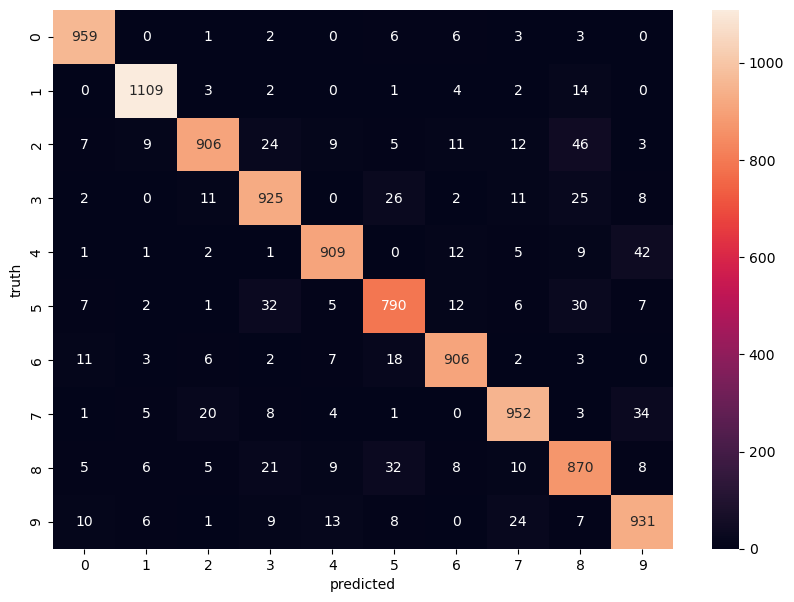

In [78]:
import seaborn as sn 
plt.figure(figsize= (10,7))
sn.heatmap(cm,annot =True ,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [82]:
model=keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10 ,activation='sigmoid')
])

model.compile(
    optimizer= 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattern , y_train,epochs=6)

Epoch 1/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2708 - accuracy: 0.9224
Epoch 2/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1210 - accuracy: 0.9644
Epoch 3/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0850 - accuracy: 0.9741
Epoch 4/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0646 - accuracy: 0.9805
Epoch 5/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0508 - accuracy: 0.9846
Epoch 6/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0409 - accuracy: 0.9874


In [86]:
model.evaluate(x_test_flattern,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0782 - accuracy: 0.9765


[0.07817284017801285, 0.9764999747276306]

In [90]:
y_predict_label=[np.argmax(i)for i in y_predict]
y_predict_label[:5]
cm= tf.math.confusion_matrix(labels=y_test,predictions=y_predict_label)

Text(95.72222222222221, 0.5, 'truth')

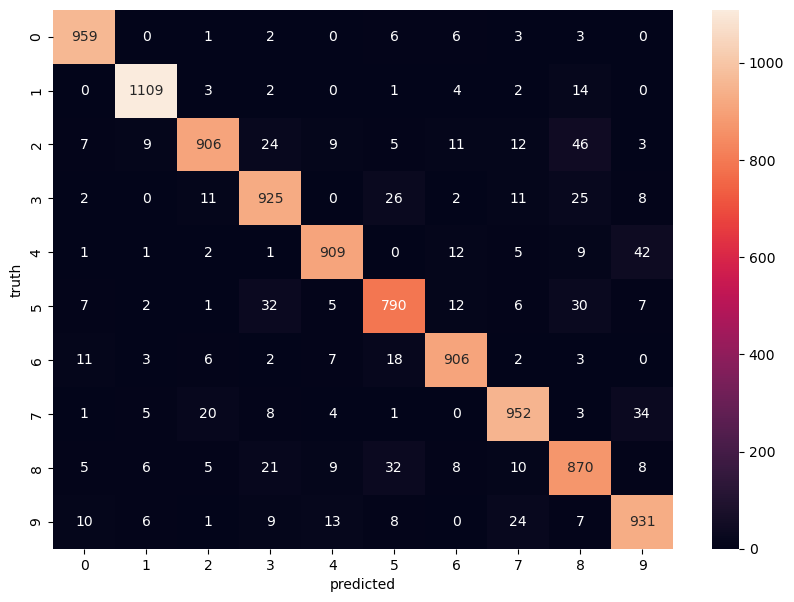

In [91]:
import seaborn as sn 
plt.figure(figsize= (10,7))
sn.heatmap(cm,annot =True ,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')